In [ ]:
# ✅ STEP 1: Install dependencies
!pip install -q roboflow
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 87.6 MB/s eta 0:00:00
Cloning into 'yolov5'...
remote: Enumerating objects: 17485, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 17485 (delta 80), reused 31 (delta 31), pack-reused 17376 (from 3)
Receiving objects: 100% (17485/17485), 16.33 MiB | 23.93 MiB/s, done.
Resolving deltas: 100% (11984/11984), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.6 MB/s eta 0

In [ ]:
# ✅ STEP 2: Set up Kaggle & download Oxford Pets dataset
import os
from google.colab import files

# Upload your kaggle.json
files.upload()

# Move kaggle.json to correct location
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download Oxford Pets dataset
!kaggle datasets download -d jessicali9530/oxford-pets-dataset
!unzip -q oxford-pets-dataset.zip -d oxford_pets


Saving kaggle.json to kaggle.json
403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/datasets/metadata/jessicali9530/oxford-pets-dataset
unzip:  cannot find or open oxford-pets-dataset.zip, oxford-pets-dataset.zip.zip or oxford-pets-dataset.zip.ZIP.


In [ ]:
from roboflow import Roboflow

# Initialize Roboflow with your API key
rf = Roboflow(api_key="rDu07a3J7xVFKsSa5HLB")

# Access the specific project and dataset version
project = rf.workspace("julius-wuwung").project("cat-vs-dog-detection")
dataset = project.version(1).download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to cat-vs-dog-detection-1 in yolov5pytorch:: 100%|██████████| 478/478 [00:00<00:00, 9282.91it/s]


In [ ]:
# Step into the yolov5 directory (do this only once)
%cd yolov5

# Run training
!python train.py --img 416 --batch 16 --epochs 30 --data {dataset.location}/data.yaml --weights yolov5s.pt --name pets_detector


[Errno 2] No such file or directory: 'yolov5'
/content/yolov5
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-05-14 09:07:22.106363: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747213642.346511    1277 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747213642.413141    1277 cuda_blas.cc:1418] Unable to register cuBLA

In [ ]:
# ✅ STEP 5: Inference
!python detect.py --weights runs/train/pets_detector/weights/best.pt --img 416 --source {dataset.location}/test/images


detect: weights=['runs/train/pets_detector/weights/best.pt'], source=/content/yolov5/cat-vs-dog-detection-1/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-418-ga493afe1 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/10 /content/yolov5/cat-vs-dog-detection-1/test/images/Cats_Test0_png.rf.601e753100f5930851936c8879693eae.jpg: 416x416 1 cat, 7.1ms
image 2/10 /content/yolov5/cat-vs-dog-detection-1/test/images/Cats_Test105_png.rf.f310118d0271dd0defb42d4b490b57c6.jpg: 416x416 1 cat,

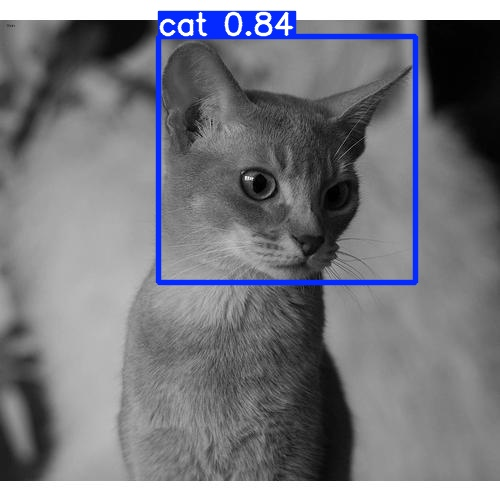

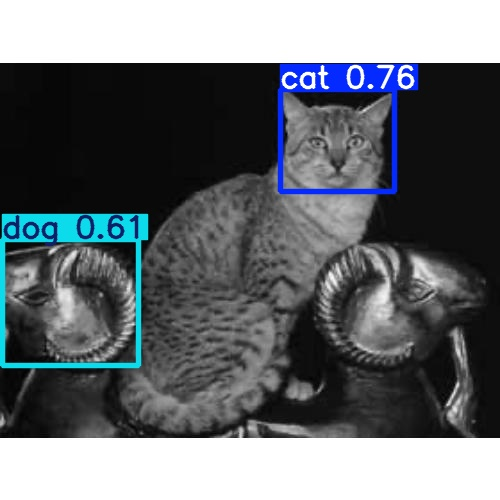

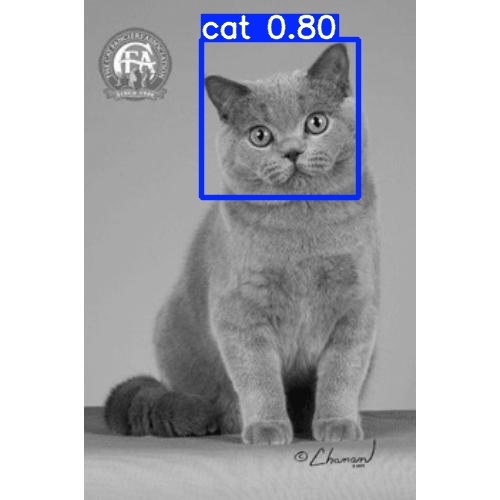

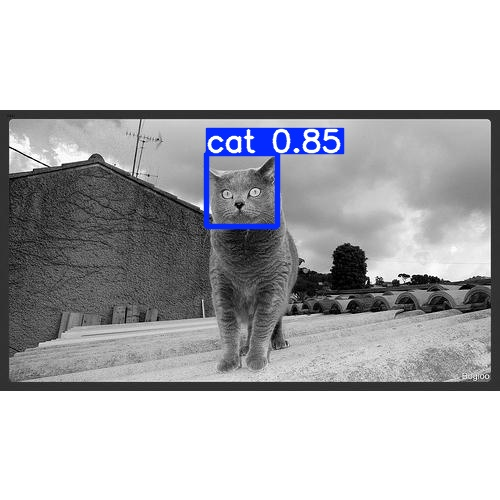

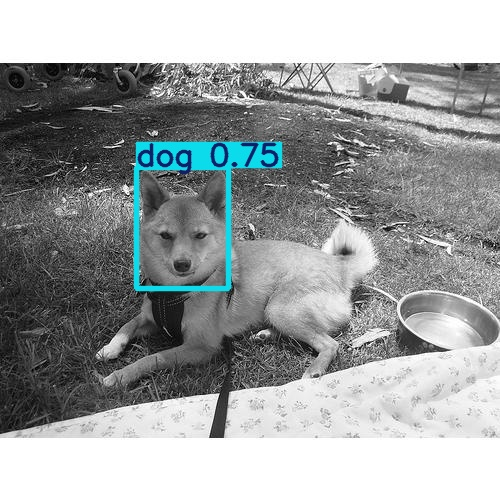

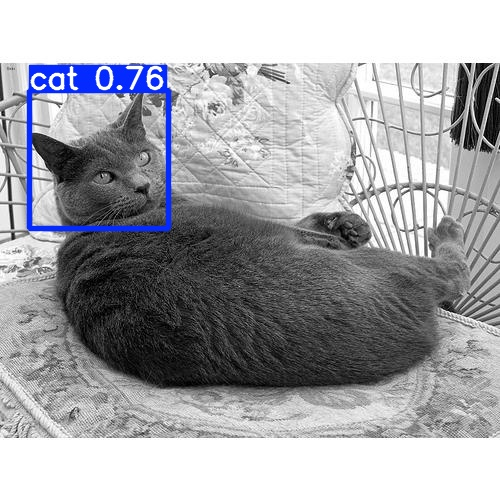

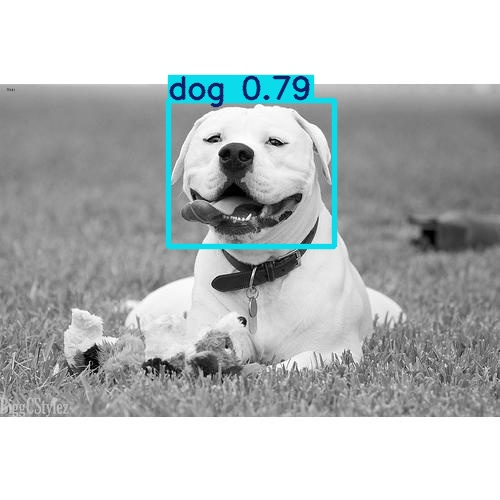

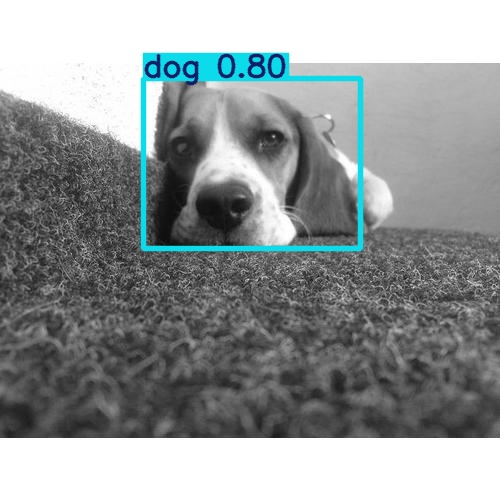

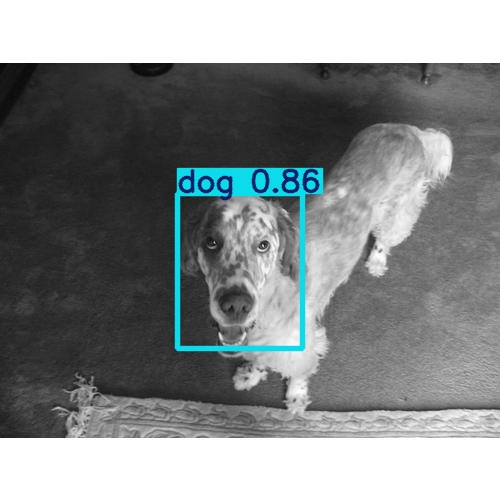

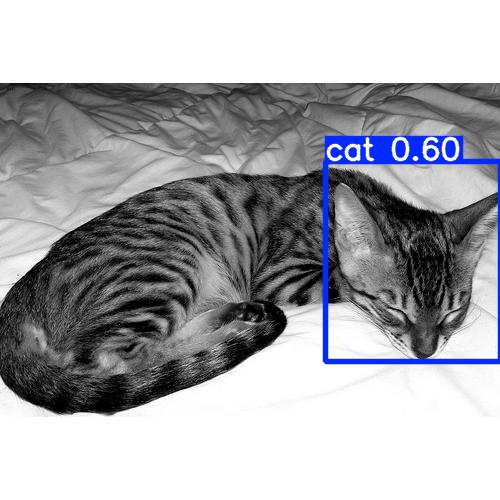

In [ ]:
import os
from IPython.display import Image, display

# Set the path to detected images
detected_path = 'runs/detect/exp'  # Update to exp2, exp3 if needed

# Display all images in the folder
for img_file in os.listdir(detected_path):
    if img_file.endswith(".jpg") or img_file.endswith(".png"):
        display(Image(filename=os.path.join(detected_path, img_file)))
